# 14 - Restroom Redoubt

https://adventofcode.com/2024/day/14


In [76]:
// Imports

import colors from "../../utils/colors.ts"
import objects from "../../utils/objects.ts"
import strings from "../../utils/strings.ts"
import numbers from "../../utils/numbers.ts"
import plots from "../../utils/plots.ts";

In [77]:
// Read Input

const file = await Deno.readTextFile("input.txt");
class CoOrds {
    x: number;
    y: number;

    constructor(x: string, y: string) {
        this.x = parseInt(x);
        this.y = parseInt(y);
    }

    equals(other: CoOrds): boolean {
        return this.x === other.x && this.y === other.y;
    }
}

class Robot {
    position: CoOrds;
    velocity: CoOrds;

    constructor(position: CoOrds, velocity: CoOrds) {
        this.position = position;
        this.velocity = velocity;
    }

    move() {
        this.position.x += this.velocity.x;
        this.position.y += this.velocity.y;
    }
}

const robots = file.split("\n").map((line) => {
    const [_, x, y, vx, vy] = line.match(/p=(\d+),(-?\d+) v=(-?\d+),(-?\d+)/);
    return new Robot(new CoOrds(x, y), new CoOrds(vx, vy));
});
robots

[
  Robot {
    position: CoOrds { x: 8, y: 15 },
    velocity: CoOrds { x: 12, y: -27 }
  },
  Robot {
    position: CoOrds { x: 58, y: 24 },
    velocity: CoOrds { x: 91, y: -30 }
  },
  Robot {
    position: CoOrds { x: 63, y: 33 },
    velocity: CoOrds { x: -60, y: -5 }
  },
  Robot {
    position: CoOrds { x: 41, y: 53 },
    velocity: CoOrds { x: 42, y: 79 }
  },
  Robot {
    position: CoOrds { x: 84, y: 100 },
    velocity: CoOrds { x: -15, y: 7 }
  },
  Robot {
    position: CoOrds { x: 19, y: 45 },
    velocity: CoOrds { x: -17, y: -25 }
  },
  Robot {
    position: CoOrds { x: 49, y: 46 },
    velocity: CoOrds { x: 14, y: 57 }
  },
  Robot {
    position: CoOrds { x: 46, y: 5 },
    velocity: CoOrds { x: -73, y: -32 }
  },
  Robot {
    position: CoOrds { x: 66, y: 41 },
    velocity: CoOrds { x: 18, y: 56 }
  },
  Robot {
    position: CoOrds { x: 83, y: 61 },
    velocity: CoOrds { x: 18, y: -63 }
  },
  Robot {
    position: CoOrds { x: 53, y: 26 },
    velocity: CoOrds {

In [78]:
// Part 1 - What will the safety factor be after exactly 100 seconds have elapsed?
const DIMENSIONS = { x: 101, y: 103 };

const findPositionPostXSeconds = (robot: Robot, seconds) => {
    const position = new CoOrds(
        (((robot.position.x + (robot.velocity.x * seconds)) % DIMENSIONS.x) + DIMENSIONS.x) % DIMENSIONS.x,
        (((robot.position.y + (robot.velocity.y * seconds)) % DIMENSIONS.y) + DIMENSIONS.y) % DIMENSIONS.y
    )
    return position;
}

const calculateSafetyFactor = (robots: Robot[], seconds: number) => {
    const quarters = { 1: [], 2: [], 3: [], 4: [] };
    const midX = Math.floor(DIMENSIONS.x / 2); // as it starts from 0
    const midY = Math.floor(DIMENSIONS.y / 2);
    robots.forEach((robot) => {
        const position = findPositionPostXSeconds(robot, seconds);
        if (position.x < midX && position.y < midY) {
            quarters[1].push(position);
        }
        if (position.x > midX && position.y < midY) {
            quarters[2].push(position);
        }
        if (position.x < midX && position.y > midY) {
            quarters[3].push(position);
        }
        if (position.x > midX && position.y > midY) {
            quarters[4].push(position);
        }
    });
    return Object.keys(quarters).reduce((acc, key) => {
        console.log(key, quarters[key].length)
        if (quarters[key].length === 0) return acc;
        return acc * quarters[key].length;
    }, 1);
}
calculateSafetyFactor(robots, 100);

1 120
2 115
3 130
4 118


211692000

In [79]:
// Part 2 - What is the fewest number of seconds that must elapse for the robots to display the Easter egg?

const MAX_ITERATIONS = 10000;
const maxOfIterations = []
const allPlots = [];

for (let i = 0; i < MAX_ITERATIONS; i++) {
    const Ys = new Array(DIMENSIONS.y).fill(0);
    const Xs = new Array(DIMENSIONS.x).fill(0);
    const positions = [];
    robots.forEach((robot) => {
        const position = findPositionPostXSeconds(robot, i);
        positions.push(position);
        Ys[position.y]++;
        Xs[position.x]++;
    });

    const maxOfYs = Math.max(...Ys);
    const maxOfXs = Math.max(...Xs);
    const max = Math.max(maxOfYs, maxOfXs);
    maxOfIterations.push(max);

    if (max >= 35) { // Start with maxOfIterations below and keep reducing it to get the right answer
        const plot = plots.scatterGraph(positions, { x: "x", y: "y" }, { render: false })
        allPlots.push({
            iteration: i,
            plot
        });
    }
}
console.log(`maxOfIterations - ${Math.max(...maxOfIterations)}`)
const htmlContent = `
<!DOCTYPE html>
<html>
<head>
  <style>
    body {
      display: flex;
      flex-wrap: wrap;
    }
  </style>
</head>
<body>
  ${allPlots.map(p => p.plot.outerHTML).join("")}
</body>
</html>
`;

await Deno.writeTextFileSync("output.html", htmlContent);

maxOfIterations - 35


6587


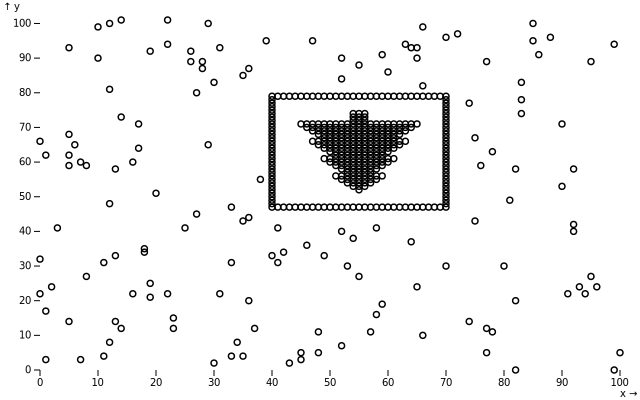

In [80]:
const answerPlot = allPlots[65] // Manual observation of the output.html
console.log(answerPlot.iteration);
const answerHtmlContent = `
<!DOCTYPE html>
<html>
<head>
  <style>
    body {
      display: flex;
      flex-wrap: wrap;
    }
  </style>
</head>
<body>
  ${answerPlot.plot.outerHTML}
</body>
</html>
`;
await Deno.jupyter.display(answerPlot.plot);